</style>
<h1  style="text-align:center;font-size:70px">
    Projet Econometrie
    <h2 style="text-align:center">
    SES722
    </h2>
    <br><br>
    <h2 style="text-align:left;font-size:20px">
      <u>  Team Member : </u>
          <h3 style="text-align:left;font-size:15px">
              <blockquote>
              Valentin Larrieu <br>
              Mickael Lopes  </blockquote>
          </h3>
     </h2>
</h1>

# Utilities

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from numpy import matlib as mb
import matplotlib.pyplot as plt 
import statsmodels as sm
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings("ignore")

/home/mickael/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
def compute_pvalue_stat(X,y,nbVar):
    n,k = X.shape
    matriceGram = np.dot(np.transpose(X),X)
    matriceGram_inv = np.linalg.inv(matriceGram)
    beta = np.dot(np.dot(matriceGram_inv,np.transpose(X)),y)
    u = y - np.dot(X,beta)
    sig2 = np.dot(u.T,u)/(n-(nbVar)) #+1
    std = np.sqrt(np.diag(sig*matriceGram_inv))
    t = beta/std
    SSR = np.dot(u.T,u)
    p_distrib = stats.t.cdf(abs(t) , n-(nbVar)) #+1
    p_value = (1 - p_distrib) * 2
    return beta, u, sig2, std, t, SSR, p_value

# Partie 1

### 1. Lire le fichier mroz.txt. Ne sélectionner que les observations pour lesquelles la variable wage est strictement positive.

In [3]:
df = pd.read_csv('textfiles/MROZ.raw', sep='\s+', header= None )
df = df.rename(columns={  0: 'inlf',
 1: 'hours',
 2: 'kidslt6',
 3: 'kidsge6',
 4: 'age',
 5: 'educ',
 6: 'wage',
 7: 'repwage',
 8: 'hushrs',
 9: 'husage',
10: 'huseduc',
11: 'huswage',
12: 'faminc',
13: 'mtr',
14: 'motheduc',
15: 'fatheduc',
16: 'unem',
17: 'city',
18: 'exper',
19: 'nwifeinc',
20: 'lwage',
21: 'expersq'})
df.head()

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.354,2.65,2708,34,...,16310,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800,0.6615,7,7,11.0,1,5,19.499980,.3285121,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300,0.7815,7,7,5.0,0,6,6.799996,.0921233,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300,0.6215,12,14,9.5,1,7,20.100060,1.524272,49


In [4]:
# Show the field type
df.dtypes

inlf          int64
hours         int64
kidslt6       int64
kidsge6       int64
age           int64
educ          int64
wage         object
repwage     float64
hushrs        int64
husage        int64
huseduc       int64
huswage     float64
faminc        int64
mtr         float64
motheduc      int64
fatheduc      int64
unem        float64
city          int64
exper         int64
nwifeinc    float64
lwage        object
expersq       int64
dtype: object

Exploring the dataframe shows that there is some values set as '.' in the 'wage' and 'lwage' columns. It is  the reason why they have been cast as object and not float. Let's replace those value by 0 and re-cast those columns as float.  

In [5]:
df['wage'].replace(to_replace='.', value=0, inplace=True)
df['lwage'].replace(to_replace='.', value=0, inplace=True)
# Convert the field type for 'wage' & 'lwage'
df['wage']= pd.to_numeric(df['wage'])
df['lwage']= pd.to_numeric(df['lwage'])

In [6]:
# Keep calue where wage positive
n_0 = df.shape[0]
df = df[df['wage']>0]
n_1 = df.shape[0]
print('We drop {} rows which have a negative wage'.format(n_0 - n_1))
print('There is {} left with a positive wage'.format(n_1))

We drop 325 rows which have a negative wage
There is 428 left with a positive wage


### 2 Faire les statistiques descriptives du salaire, de l’age et de l’éducation pour l’ensemble des femmes puis, pour les femmes dont le salaire du mari est supérieure à la médiane de l’échantillon, puis pour les femmes dont le salaire du mari est inférieur à la médiane de l’échantillon

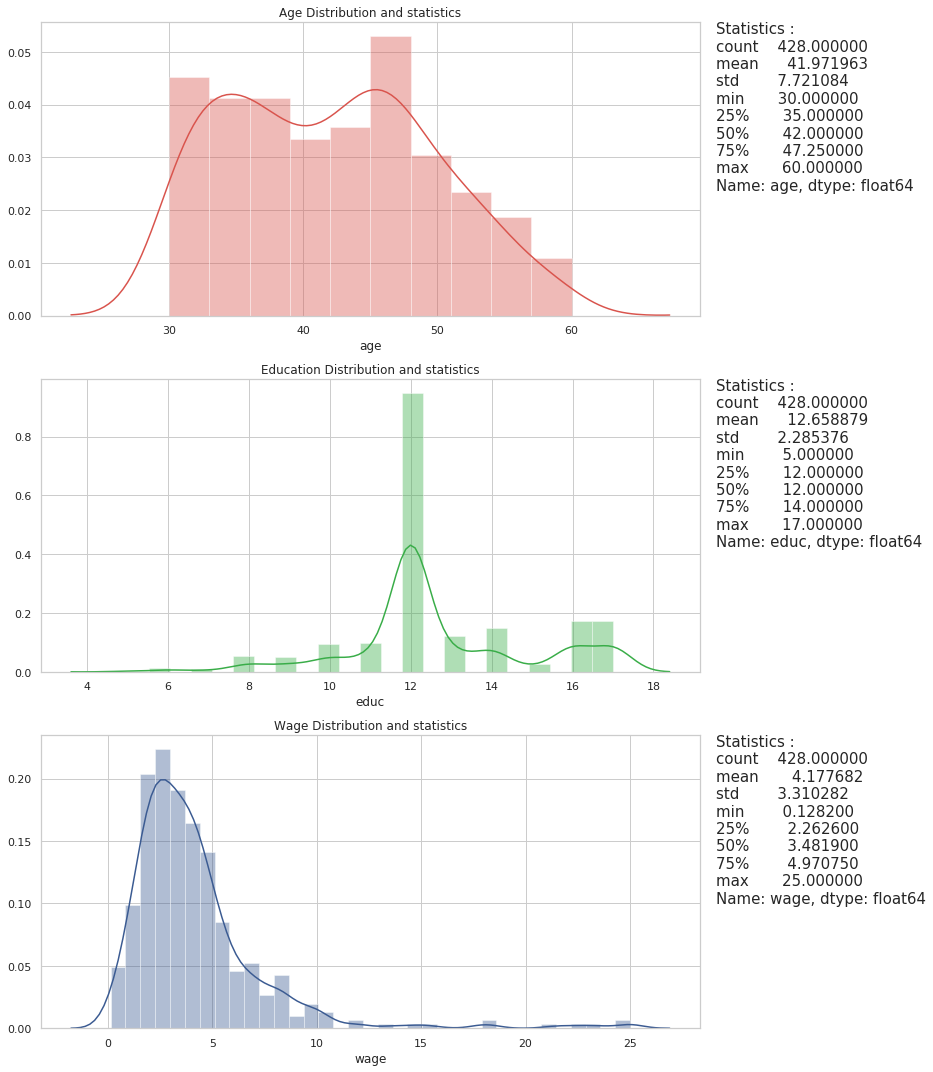

In [49]:
f , (ax1,ax2,ax3) = plt.subplots(3,1, figsize = (10,15))
ax1.set_title("Age Distribution and statistics")
sns.distplot(df['age'], ax=ax1, color = sns.xkcd_rgb["pale red"]);
plt.figtext(1, 0.82, 'Statistics :\n'+str(df['age'].describe()), axes = ax1, fontsize = 15 )
ax2.set_title("Education Distribution and statistics")
sns.distplot(df['educ'], ax=ax2, color = sns.xkcd_rgb["medium green"] );
plt.figtext(1, 0.49, 'Statistics :\n'+str(df['educ'].describe()), axes = ax2, fontsize = 15 )
ax3.set_title("Wage Distribution and statistics")
sns.distplot(df['wage'], ax=ax3, color = sns.xkcd_rgb["denim blue"]);
plt.figtext(1, 0.16, 'Statistics :\n'+str(df['wage'].describe()), axes = ax3, fontsize = 15 )
plt.tight_layout()
plt.show()

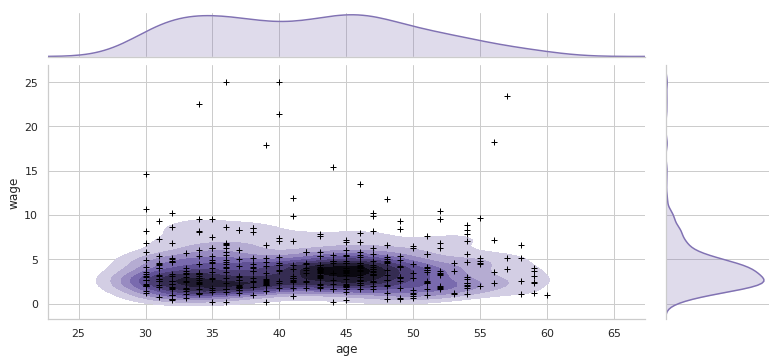

In [24]:
# We will also be interested to plot the relationship between wage & age as well as Wage & eductation
g = sns.jointplot(x="age", y="wage", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="black", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels('age', 'wage')
plt.gcf().set_size_inches(12, 5)
plt.show()

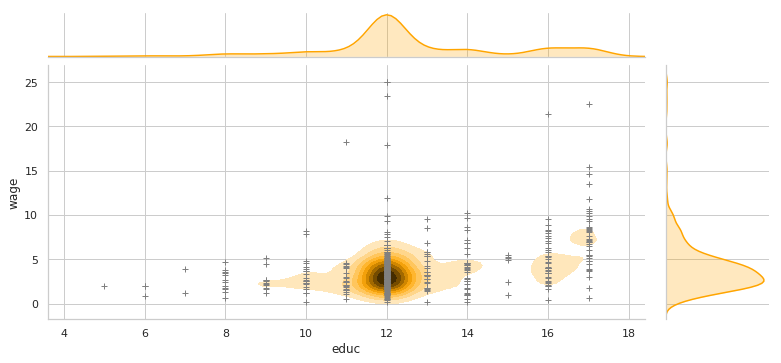

In [25]:
g = sns.jointplot(x="educ", y="wage", data=df, kind="kde", color="orange")
g.plot_joint(plt.scatter, c="gray", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels('educ', 'wage')
plt.gcf().set_size_inches(12, 5)
plt.show()

In [26]:
# We will now try to make the same description for woman 
# with husband salary < or > of husbsalary median
huswage_med = np.median(df['huswage'].values)
df_above = pd.DataFrame(columns = ['age','wage','educ'])
df_below = pd.DataFrame(columns = ['age','wage','educ'])
df_above = df_above.append(df[df['huswage'] >= huswage_med][['age','wage','educ']]).astype(float)
df_below = df_below.append(df[df['huswage'] < huswage_med][['age','wage','educ']]).astype(float)

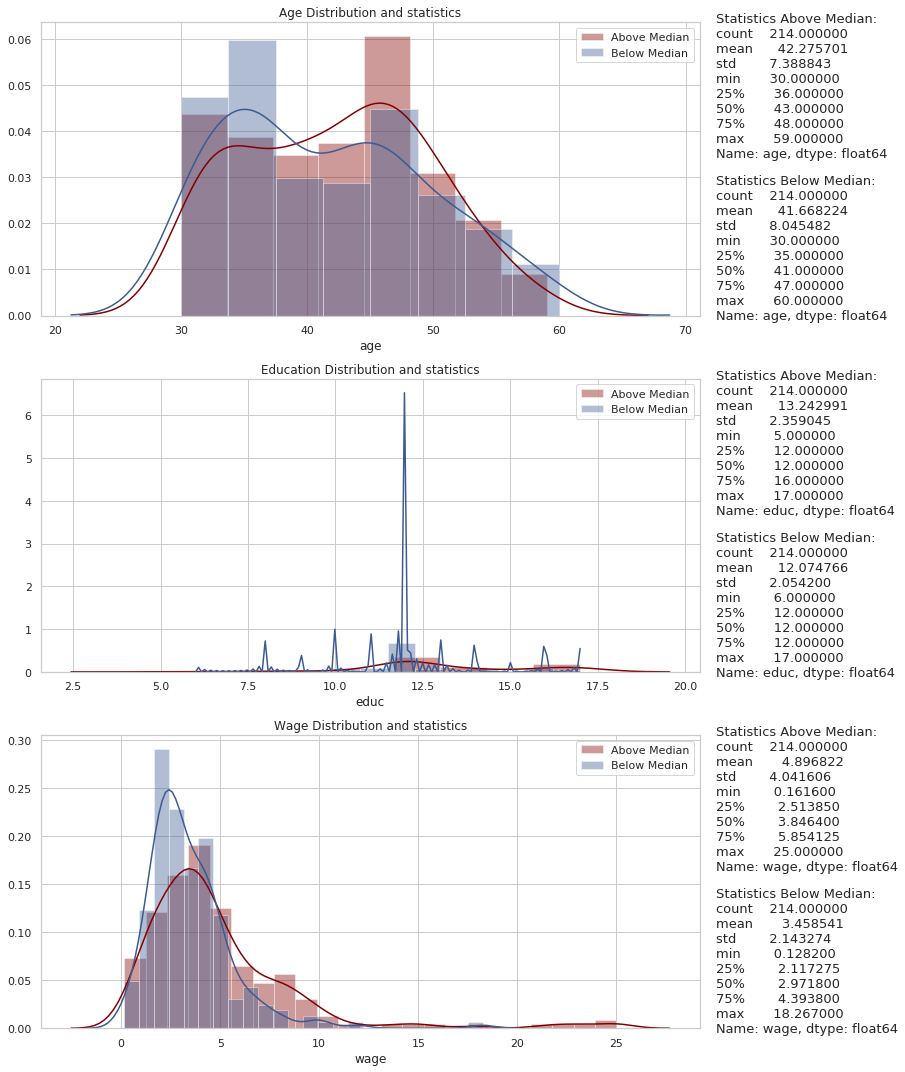

In [45]:
f , (ax1,ax2,ax3) = plt.subplots(3,1, figsize = (10,15))
ax1.set_title("Age Distribution and statistics")
sns.distplot(df_above['age'], ax=ax1, color = sns.xkcd_rgb["dark red"], label='Above Median')
sns.distplot(df_below['age'], ax=ax1, color = sns.xkcd_rgb["denim blue"], label = 'Below Median')
ax1.legend()
plt.figtext(1, 0.85, 'Statistics Above Median:\n'+str(df_above['age'].describe()), axes = ax1, fontsize = 13 )
plt.figtext(1, 0.7, 'Statistics Below Median:\n'+str(df_below['age'].describe()), axes = ax1, fontsize = 13 )
ax2.set_title("Education Distribution and statistics")
sns.distplot(df_above['educ'], ax=ax2, color = sns.xkcd_rgb["dark red"], label='Above Median')
sns.distplot(df_below['educ'], ax=ax2, color = sns.xkcd_rgb["denim blue"], label = 'Below Median')
plt.figtext(1, 0.52, 'Statistics Above Median:\n'+str(df_above['educ'].describe()), axes = ax1, fontsize = 13 )
plt.figtext(1, 0.37, 'Statistics Below Median:\n'+str(df_below['educ'].describe()), axes = ax1, fontsize = 13 )
ax2.legend()
ax3.set_title("Wage Distribution and statistics")
sns.distplot(df_above['wage'], ax=ax3, color = sns.xkcd_rgb["dark red"], label='Above Median')
sns.distplot(df_below['wage'], ax=ax3, color = sns.xkcd_rgb["denim blue"], label = 'Below Median')
plt.figtext(1, 0.19, 'Statistics Above Median:\n'+str(df_above['wage'].describe()), axes = ax1, fontsize = 13 )
plt.figtext(1, 0.04, 'Statistics Below Median:\n'+str(df_below['wage'].describe()), axes = ax1, fontsize = 13 )
ax3.legend()
plt.tight_layout()
plt.show()

### 3. Faire l'histogramme de la variable wage. Calculer le log de wageet faire l'histogramme. Comparez les deux histogrammes et commenter

## 4
4. Calculer les corrélations motheduc et fatheduc. Commentez. Il y a-t-il un problème de
multicollinéarité si l'on utilise ces variables comme variables explicatives ?

## 5
5. Faites un graphique en nuage de point entre wage et educ, wage et exper, wage et fatheduc.
Commentez. S'agit-il d'un effet "toute chose étant égale par ailleurs ?"

## 6
6. Quelle est l'hypothèse fondamentale qui garanti des estimateurs non biaisés ? Expliquer le
biais de variable omise


## 7
7. Faire la régression de wage en utilisant les variables explicatives un constante, city, educ,
exper, nwifeinc, kidslt6, kidsgt6. Commentez l'histogramme des résidus.

## 8
8. Faire la régrssion de lwage sur une constante, city, educ, exper, nwifeinc, kidslt6, kidsgt6.
Comparer l’histogramme obtenu à celui de la question 7.

## 9
9. Tester l'hypothèse de non significativité de exper avec un seuil de significativité de 1%, 5% et
10% (test alternatif des deux côtés). Commentez les p-values.

## 10
10. Tester l’hypothèse que le coefficient associé à educ est égal à 10% avec un seuil de
significativité de 5% (test à alternatif des deux côtés)

## 11
11. Tester l’hypothèse jointe que le rendement de l’éducation est de 10% et que celui de
l’expérience professionnelle est de 5%.

## 12
12. De combien augmente le salaire en pourcentage avec 10 années d’expérience ?

## 13
13. Tester l’égalité des coefficients associés aux variables kidsgt6 et kidslt6. Interprétez.

## 14
14. En utilisant le modèle de la question 7, faire le test d'hétéroscédasticité de forme linéaire en
donnant la p-valeur. Corriger le problème par rapport à la variable la plus importante en
utilisant la méthode des MCG. Comparer les écarts-types des coefficients estimés avec ceux
obtenus à la question 7. Commenter.

## 15
15. Tester le changement de structure de la question 8 entre les femmes qui ont moins de 30
ans, entre 30 et 43 ans, plus de 43 ans (3 groupes mutuellement exclusifs). Donnez les pvaleurs.

## 16
16. A partir de la variable kidslt6, créer un ensemble de variables binaires pour le nombre
d’enfants de moins de 6 ans. Refaire la question 8 avec ces variables et en utilisant comme
référence les femmes qui ont des enfants de plus de 6 ans. Ces catégories sont-elles
mutuellement exclusives ? Interprétez les paramètres associés aux variables binaires. Faire le
test de non significativité de l’ensemble des variables binaires. Donnez les p-valeurs

## 17
17. A partir de l’échantillon global, faire une régression de inlf sur une constante, city, educ, age,
kidslt6, kidsgt6. Interprétez les coefficients estimés.

## 18
18. Estimer le modèle probit de inlf sur une constante, city, educ, age, kidslt6, kidsgt6. Faire le
test de non significativité jointes des coefficients associés à kidslt6 et à kidsgt6. Comparez le
résultat du test à celuir de la question 18.

## 19
19. Calculer les effets partiels pour l'ensemble des variables explicatives : p(y1)/xk (k = 1, ...,
K), où K est le nombre de variables explicatives. Comparer vos résultats à ceux obtenus à la
question 17. Commentez.

## 20
20. Faire le test de non significativité jointes des coefficients associés à kidslt6 et à kidsgt6 en
utilisant la méthode du rapport de vraisemblance. Comparez aux résultazts de la question 18.

# Partie 2

## 1
1. Importer les données du fichier quarterly.xls (corriger le problème éventuel d’observations
manquantes)

In [16]:
df = pd.read_excel('C://Users//Orion//Documents//MS-BGD//Econometrie/projet//quarterly.xls', sep='\s+')

df.head(20)

,DATE,FFR,Tbill,Tb1yr,r5,r10,PPINSA,Finished,CPI,CPICORE,M1NSA,M2SA,M2NSA,Unemp,IndProd,RGDP,Potent,Deflator,Curr
0,1960Q1,3.93,3.87,4.57,4.64,4.49,31.67,33.20,29.40,18.92,140.53,896.1,299.40,5.13,23.93,2845.3,2824.2,18.521,31.830
1,1960Q2,3.70,2.99,3.87,4.30,4.26,31.73,33.40,29.57,19.00,138.40,903.3,300.03,5.23,23.41,2832.0,2851.2,18.579,31.862
2,1960Q3,2.94,2.36,3.07,3.67,3.83,31.63,33.43,29.59,19.07,139.60,919.4,305.50,5.53,23.02,2836.6,2878.7,18.648,32.217
3,1960Q4,2.30,2.31,2.99,3.75,3.89,31.70,33.67,29.78,19.14,142.67,932.8,312.30,6.27,22.47,2800.2,2906.7,18.700,32.624
4,1961Q1,2.00,2.35,2.87,3.64,3.79,31.80,33.63,29.84,19.17,142.23,948.9,317.10,6.80,22.13,2816.9,2934.8,18.743,32.073
5,1961Q2,1.73,2.30,2.94,3.62,3.79,31.47,33.33,29.83,19.23,141.40,966.4,320.97,7.00,23.00,2869.6,2962.9,18.785,32.131
6,1961Q3,1.68,2.30,3.01,3.90,3.98,31.50,33.33,29.95,19.32,142.00,982.7,326.50,6.77,23.74,2915.9,2991.3,18.843,32.699
7,1961Q4,2.40,2.46,3.10,3.84,3.97,31.53,33.37,29.99,19.37,146.63,1000.0,334.70,6.20,24.57,2975.3,3019.9,18.908,33.421
8,1962Q1,2.46,2.72,3.21,3.84,4.02,31.70,33.53,30.11,19.44,146.37,1020.7,341.17,5.63,24.94,3028.7,3048.7,19.020,33.136
9,1962Q2,2.61,2.72,3.02,3.63,3.87,31.53,33.43,30.22,19.51,145.33,1042.3,346.23,5.53,25.18,3062.1,3078.0,19.047,33.468


## 2
2. Calculer inf, le taux d’inflation à partir de la variable CPI. Faire un graphique dans le temps de inf. Commentez.

## 3
3. Interpréter l'autocorrélogramme et l'autocorrélogrammes partiels de inf. Quelle est la
différence entre ces deux graphiques ?

## 4
4. Quelle est la différence entre la stationnarité et l'ergodicité ? Pourquoi a-t-on besoin de ces
deux conditions. Expliquez le terme "spurious regression".

## 5
5. Proposer une modélisation AR(p) de inf, en utilisant tous les outils vus au cours.

## 6
6. Estimer le modèle de la courbe de Philips qui explique le taux de chômage (Unemp) en
fonction du taux d’inflation courant et une constante.

## 7
7. Tester l’autocorrélation des erreurs.

## 8
8. Corriger l’autocorrélation des erreurs par la méthode vue en cours.

## 9
9. Tester la stabilité de la relation chômage-inflation sur deux sous-périodes de taille identique.

## 10
10. Faites les tests changement de structure de Chow et détecter le point de rupture.

## 11
11. Estimer la courbe de Philips en supprimant l'inflation courante des variables explicatives mais
en ajoutant les délais d’ordre 1, 2, 3 et 4 de l’inflation et du chômage. Faire le test de
Granger de non causalité de l’inflation sur le chômage. Donnez la p-valeur.

## 12
12. Représentez graphiquement les délais distribués et commentez. Calculer l’impact à long de
terme de l’inflation sur le chômage.